In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from os import path, listdir

In [2]:
PATH = 'dataset/'

train_dir = path.join(PATH, 'train')
test_dir  = path.join(PATH, 'test')

train_hotdog_dir     = path.join(train_dir, 'hot_dog')
train_not_hotdog_dir = path.join(train_dir, 'not_hot_dog')
test_hotdog_dir      = path.join(test_dir, 'hot_dog')
test_not_hotdog_dir  = path.join(test_dir, 'not_hot_dog')

In [3]:
IMG_DIM = (256, 256)

In [7]:
batch_size=64

In [5]:
data_gen_para = {
    'rescale': 1/255,
    'horizontal_flip': True,
    'vertical_flip': True,
    'rotation_range': 30
}

train_image_gen = ImageDataGenerator(**data_gen_para)
test_image_gen = ImageDataGenerator(**data_gen_para)

In [8]:
train_data_gen = train_image_gen.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    color_mode='rgb',
                                                    target_size=IMG_DIM,
                                                    class_mode='binary')
test_data_gen = test_image_gen.flow_from_directory(batch_size=batch_size,
                                                    directory=test_dir,
                                                    class_mode='binary')

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [9]:
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(*IMG_DIM, 3)),
    MaxPooling2D(),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(.1),
    Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 524288)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                33554496  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 33,555,457
Trainable params: 33,555,457
Non-trainable params: 0
____________________________________________

In [12]:
total_train_size = len(listdir(train_hotdog_dir)) + len(listdir(train_not_hotdog_dir))
total_test_size = len(listdir(test_hotdog_dir)) + len(listdir(test_not_hotdog_dir))
total_data_size = total_train_size + total_test_size

In [13]:
history = model.fit(train_data_gen,
                   epochs=20,
                   steps_per_epoch=total_train_size // batch_size,
                   validation_data=test_data_gen)

Epoch 1/20
7/7 [==============================] - 49s 7s/step - loss: 10.2407 - accuracy: 0.4940 - val_loss: 2.4769 - val_accuracy: 0.5080
Epoch 2/20
7/7 [==============================] - 38s 6s/step - loss: 2.2931 - accuracy: 0.5714 - val_loss: 1.1620 - val_accuracy: 0.5080
Epoch 3/20
7/7 [==============================] - 38s 6s/step - loss: 1.1268 - accuracy: 0.5921 - val_loss: 1.0746 - val_accuracy: 0.5000
Epoch 4/20
7/7 [==============================] - 38s 6s/step - loss: 1.0236 - accuracy: 0.5155 - val_loss: 0.7748 - val_accuracy: 0.5460
Epoch 5/20
7/7 [==============================] - 38s 6s/step - loss: 0.8273 - accuracy: 0.5688 - val_loss: 0.8175 - val_accuracy: 0.5200
Epoch 6/20
7/7 [==============================] - 38s 6s/step - loss: 0.7045 - accuracy: 0.5611 - val_loss: 0.7188 - val_accuracy: 0.5340
Epoch 7/20
7/7 [==============================] - 37s 6s/step - loss: 0.6870 - accuracy: 0.5515 - val_loss: 0.6869 - val_accuracy: 0.5440
Epoch 8/20
7/7 [=================

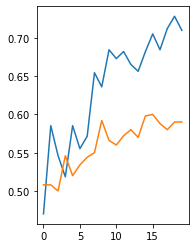

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Training Accuracy')
plt.show()